Usando o exemplo 499

OBS: Mesmo em classificadores lineares, a interpretação dos coeficientes depende da configuração binária ou multiclasse do modelo, sendo necessário ajustar o sinal dos pesos para garantir consistência semântica na explicação local.

In [52]:
#instalando bibilioteca pandas
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install nltk
%pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
#importando pacotes e bibliotecas para um SVM

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
#from sklearn.feature_extraction.text import CountVectorizer #converter os textos em uma matriz
from sklearn.feature_extraction.text import TfidfTransformer #frequencia que o termo aparece

#from sklearn.svm import LinearSVC, SVC # dados lineares / não lineares

In [54]:
#importando dataset

df = pd.read_csv("../news_clean_onlly.csv")

In [55]:
df.head(50-60)

,Unnamed: 0,title,subject,date,Label,clean_text,label_number,char_count,word_count,avg_word_length
0,0,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",Fake,donald trump just couldn t wish all americans ...,0,2620,474,5.527426
1,1,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",Fake,house intelligence committee chairman devin nu...,0,1850,304,6.085526
2,2,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",Fake,on friday it was revealed that former milwauke...,0,3298,564,5.847518
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",Fake,on christmas day donald trump announced that h...,0,2462,423,5.820331
4,4,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",Fake,pope francis used his annual christmas day mes...,0,2292,420,5.457143
...,...,...,...,...,...,...,...,...,...,...
38501,44882,"Argentina labor unions protest job losses, Mac...",worldnews,"August 22, 2017",True,buenos aires reuters argentina s main labor un...,1,1518,252,6.023810
38502,44883,Exclusive: Trump's Afghan decision may increas...,worldnews,"August 22, 2017",True,on board a us military aircraft reuters the us...,1,5587,930,6.007527
38503,44884,U.S. puts more pressure on Pakistan to help wi...,worldnews,"August 21, 2017",True,washington reuters the united states suggested...,1,4488,730,6.147945
38504,44885,Exclusive: U.S. to withhold up to $290 million...,worldnews,"August 22, 2017",True,washington reuters the united states has decid...,1,3352,556,6.028777


In [56]:
df.shape

(38516, 10)

<Axes: xlabel='Label', ylabel='count'>

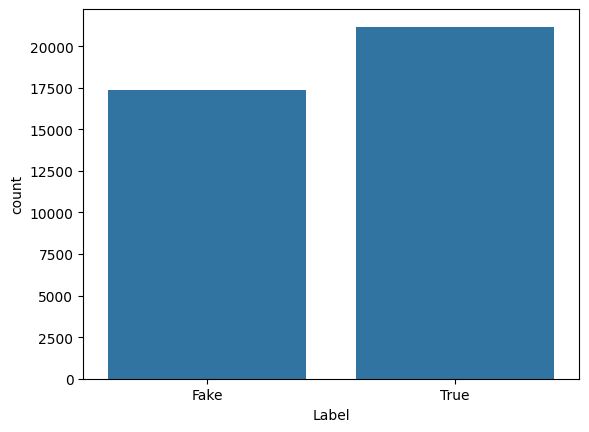

In [57]:
#exibindo os dados em um gráfico de barras
sns.countplot(x='Label', data=df)

**Pré-processamento**

In [58]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Baixar pacotes necessários do NLTK
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab') # Download the 'punkt_tab' resource

[nltk_data] Downloading package stopwords to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [59]:
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()

    # Remover caracteres especiais e números
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenização (dividir em palavras)
    tokens = word_tokenize(text)

    # Remover stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematização (reduzir palavras à sua forma base)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Juntar as palavras processadas de volta em uma string
    return " ".join(tokens)

In [60]:
df["clean_text"] = df["title"].apply(preprocess_text)

In [61]:
df.head(5)

,Unnamed: 0,title,subject,date,Label,clean_text,label_number,char_count,word_count,avg_word_length
0,0,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",Fake,donald trump sends embarrassing new year eve m...,0,2620,474,5.527426
1,1,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",Fake,drunk bragging trump staffer started russian c...,0,1850,304,6.085526
2,2,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",Fake,sheriff david clarke becomes internet joke thr...,0,3298,564,5.847518
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",Fake,trump obsessed even obamas name coded website ...,0,2462,423,5.820331
4,4,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",Fake,pope francis called donald trump christmas speech,0,2292,420,5.457143


<Axes: xlabel='Label', ylabel='count'>

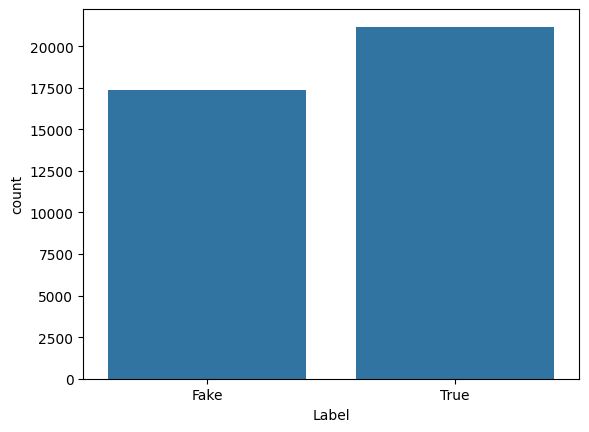

In [62]:
sns.countplot(x="Label", data=df) # validando se mudou as classes

TREINAMENTO

In [63]:
# Assuming 'text' is the column name containing the text data and 'sentiment' is the target column
X = df['clean_text']
y = df['Label']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["Label"], test_size=0.2, random_state=42)

In [65]:
# Import necessary libraries for the pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC

# Define and fit the pipeline
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to numerical features
    ('tfidf', TfidfTransformer()),  # Apply TF-IDF transformation
    ('clf', LinearSVC()),  # Use a LinearSVC classifier (you can change this to another classifier)
])
pipeline.fit(X_train, y_train)  # Train the pipeline on the training data

,steps,"[('vect', ...), ('tfidf', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [66]:
#exibindo 5 dados de teste
print(X_test.head(101))

1285     mexico make toilet paper great american wipe a...
32943    u draft un resolution seek extension syria che...
32796     lebanon pm hariri resigns assails iran hezbollah
18750    white house say trump confidence secretary sta...
1278     john cleese nail stupidity trump london tweet ...
                               ...                        
4630     rape apparently doesnt earn jail time anymore ...
3840     watch irish senator blast government playing n...
28935    exclusive china border city north korea eas to...
15676    russia hammer isiskills jihadis china reported...
34673    closely fought election test kyrgyzstan fragil...
Name: clean_text, Length: 101, dtype: object


**LIME**

In [67]:
from IPython.display import display
from lime.lime_text import LimeTextExplainer

# Criando o explainer
explainer = LimeTextExplainer(class_names=list(pipeline.classes_))


def predict_proba(texts):
    # LIME espera probabilidades, mas LinearSVC não tem predict_proba.
    # Usamos decision_function e normalizamos para somar 1 (softmax-like).
    scores = pipeline.decision_function(texts)
    import numpy as np
    # Se for 1D (binary), transforma em 2D
    if len(scores.shape) == 1:
        scores = np.vstack([-scores, scores]).T
    # Softmax para converter scores em "probabilidades"
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / exp_scores.sum(axis=1, keepdims=True)
    return probs

# Solicita ao usuário o número da linha do exemplo
idx = int(input(f"Digite o número da linha (0 a {len(X_test)-1}): "))
sample_text = X_test.iloc[idx]
sample_label = y_test.iloc[idx]

# Predição da classe para o texto selecionado
pred_class_name = pipeline.predict([sample_text])[0]

print(f"Número da linha no X_test: {idx}")
print(f"Original text:\n{sample_text}")
print(f"Real class: {sample_label}")
print(f"Classe predita: {pred_class_name}")

explanation = explainer.explain_instance(
    sample_text,
    predict_proba,
    num_features=10
)

Número da linha no X_test: 499
Original text:
party motherland north korea kim herald missile test setback
Real class: True
Classe predita: True


In [68]:
# Obtém as palavras mais importantes e seus pesos
lime_features = explanation.as_list()

# Exibe cada palavra com seu impacto na predição
print("Palavras mais importantes e seus pesos:")
for word, weight in lime_features:
    print(f"{word}: {weight:.4f}")


Palavras mais importantes e seus pesos:
north: 0.0758
korea: 0.0483
setback: 0.0266
party: 0.0147
kim: -0.0132
herald: -0.0073
test: 0.0040
missile: 0.0029
motherland: 0.0008


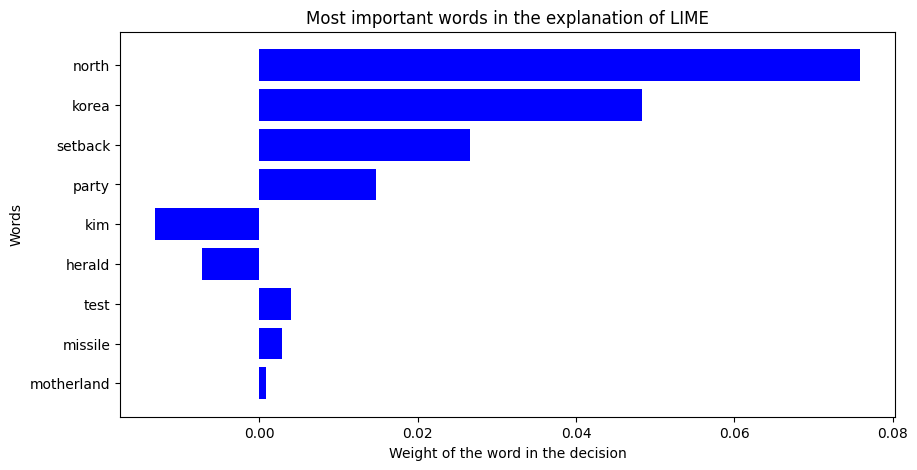

In [69]:
# Separar palavras e pesos
words, weights = zip(*lime_features)

# Criar gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(words, weights, color="blue")
plt.xlabel("Weight of the word in the decision")
plt.ylabel("Words")
plt.title("Most important words in the explanation of LIME")
plt.gca().invert_yaxis()  # Inverter para mostrar a palavra mais importante no topo
plt.show()

In [70]:
explanation_list = explanation.as_list()
lime_df = pd.DataFrame(explanation_list, columns=["Words", "Impact"])

# Ordenar por impacto
lime_df = lime_df.sort_values(by="Impact", ascending=False)

display(lime_df.head(20))  # Exibir as 20 palavras mais impactantes

,Words,Impact
0,north,0.075843
1,korea,0.048290
2,setback,0.026599
3,party,0.014672
6,test,0.003973
7,missile,0.002875
8,motherland,0.000792
5,herald,-0.007261
4,kim,-0.013170


**Métricas**

In [71]:
from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = pipeline.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        Fake       0.95      0.92      0.93      3504
        True       0.93      0.96      0.94      4200

    accuracy                           0.94      7704
   macro avg       0.94      0.94      0.94      7704
weighted avg       0.94      0.94      0.94      7704



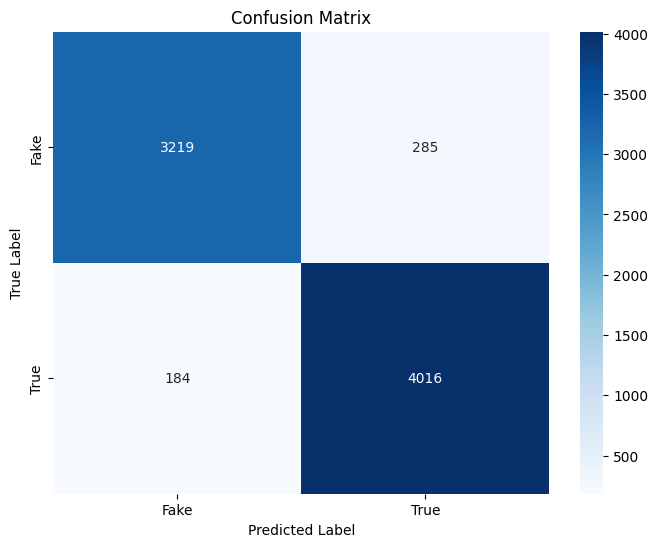

In [72]:
# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=df["Label"].unique(), yticklabels=df["Label"].unique())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Usando 'weighted' para classes múltiplas
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Acuraccy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Acuraccy: 0.9391
Precision: 0.9393
Recall: 0.9391
F1-Score: 0.9390


**Attention Vizualization**

A interpretação da atenção no SVM é diferente da interpretação em redes neurais. No SVM, a atenção é representada pela importância das features na decisão do modelo.

In [74]:
print(pipeline.classes_)

['Fake' 'True']


Palavras do exemplo e seus pesos na decisão da classe prevista:
       Feature    Weight
11955    north  1.445334
9843     korea  0.949526
15781  setback  0.490945
12739    party  0.381402
17562     test  0.231794
11240  missile  0.207583
8261    herald  0.198641
9768       kim  0.041671


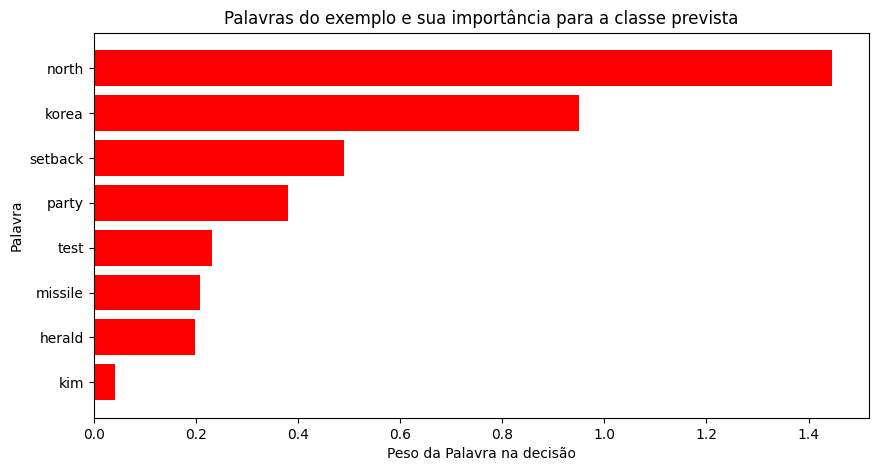

In [75]:
# Obter os nomes das features do CountVectorizer
feature_names = pipeline.named_steps['vect'].get_feature_names_out()

# Obter os coeficientes do SVM para a classe prevista
clf = pipeline.named_steps['clf']
vect = pipeline.named_steps['vect']

# Sempre existe apenas um vetor de pesos no caso binário
pesos = clf.coef_[0]

classe_prevista = pipeline.predict([sample_text])[0]
classes = pipeline.classes_

# Ajustar o sinal para explicar a classe prevista
if classe_prevista == classes[0]:
    pesos = -pesos

# Criar DataFrame com as features e pesos
importancias = pd.DataFrame({'Feature': feature_names, 'Weight': pesos})

# Marcar as palavras do exemplo
#palavras_exemplo = set(sample_text.split())
palavras_exemplo = set(vect.build_analyzer()(sample_text))
importancias['No_Exemplo'] = importancias['Feature'].apply(lambda x: x in palavras_exemplo)

# Visualizar as palavras do exemplo e seus pesos
importancias_exemplo = importancias[importancias['No_Exemplo']].sort_values(by='Weight', ascending=False)

print("Palavras do exemplo e seus pesos na decisão da classe prevista:")
print(importancias_exemplo[['Feature', 'Weight']])

# Plotar as palavras do exemplo
plt.figure(figsize=(10, 5))
plt.barh(importancias_exemplo['Feature'], importancias_exemplo['Weight'], color="red")
plt.xlabel("Peso da Palavra na decisão")
plt.ylabel("Palavra")
plt.title("Palavras do exemplo e sua importância para a classe prevista")
plt.gca().invert_yaxis()
plt.show()

In [76]:
# Vetorizar o texto
x_texto = vect.transform([sample_text]).toarray()[0]

# Contribuição local (x_i * w_i)
importancias = pd.DataFrame({
    'Feature': vect.get_feature_names_out(),
    'Weight': pesos,
    'Contribution': x_texto * pesos
})

# Apenas palavras presentes
importancias_exemplo = importancias[importancias['Contribution'] != 0] \
    .sort_values(by='Contribution', ascending=False)


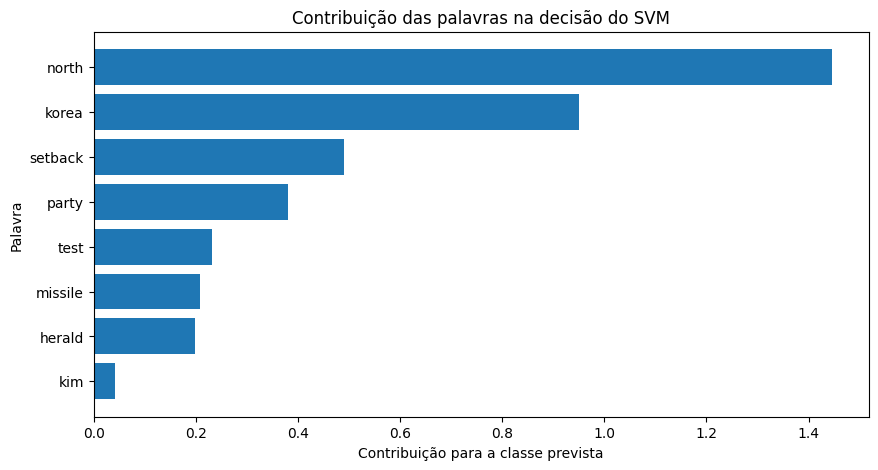

In [77]:
plt.figure(figsize=(10,5))
plt.barh(importancias_exemplo['Feature'], importancias_exemplo['Contribution'])
plt.xlabel("Contribuição para a classe prevista")
plt.ylabel("Palavra")
plt.title("Contribuição das palavras na decisão do SVM")
plt.gca().invert_yaxis()
plt.show()
